In [46]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import numpy as np

def make_linear_stepped_routines(J_V_ratios, mu_V_ratios, time_array, dt):
    if len(J_V_ratios) != len(mu_V_ratios) or len(J_V_ratios) != len(time_array):
        raise ValueError("The length of J_V_ratios, mu_V_ratios, and time_array must be equal.")
    
    num_steps = len(time_array)
    
    times = []
    J_V_ratio_steps = []
    mu_V_ratio_steps = []
    start_time = 0
    
    for i in range(num_steps):
        t = time_array[i]
        time_array_i = np.linspace(start_time, start_time + t, num=int(t / dt))
        times.append(time_array_i)
        
        J_V_ratio_steps.append(np.linspace(J_V_ratios[i][0], J_V_ratios[i][1], len(time_array_i)))
        mu_V_ratio_steps.append(np.linspace(mu_V_ratios[i][0], mu_V_ratios[i][1], len(time_array_i)))
        
        start_time += t
    
    concatenated_times = np.concatenate(times)
    J_V_ratio_routine = np.concatenate(J_V_ratio_steps)
    mu_V_ratio_routine = np.concatenate(mu_V_ratio_steps)
    
    return concatenated_times, J_V_ratio_routine, mu_V_ratio_routine

df = pd.read_csv("energy_gap_over_V_neg_V_resolution=1000_25x25.csv", index_col='J/V_ratios')
energy_gap_grid = df.to_numpy()

J_V_ratios = np.linspace(-25,25,1000)
mu_V_ratios = np.linspace(0,25,1000)
mu_V_ratio_grid, J_V_ratio_grid = np.meshgrid(mu_V_ratios, J_V_ratios)


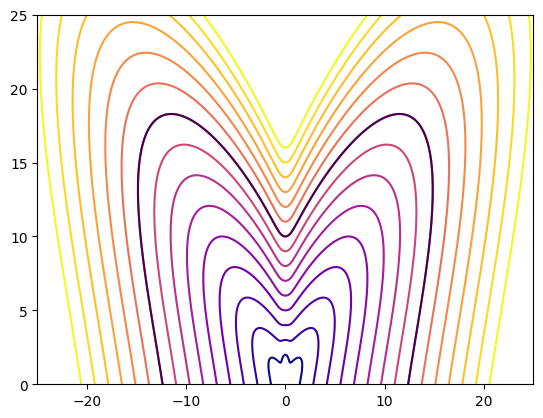

In [47]:
target_contour_value = 9
plt.contour(J_V_ratio_grid, mu_V_ratio_grid, energy_gap_grid, levels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], cmap = "plasma")
contour_plot = plt.contour(J_V_ratio_grid, mu_V_ratio_grid, energy_gap_grid, levels=[target_contour_value], color = "k", linewidth = 10)
contour_paths = contour_plot.collections[0].get_paths()

x_values = []
y_values = []

for path in contour_paths:
    vertices = path.vertices
    x_values.extend(vertices[:, 0])
    y_values.extend(vertices[:, 1])

half_index = len(x_values) // 2

x_values_second_half = x_values[:half_index][::-1]
y_values_second_half = y_values[:half_index][::-1]

0.9605243215533077


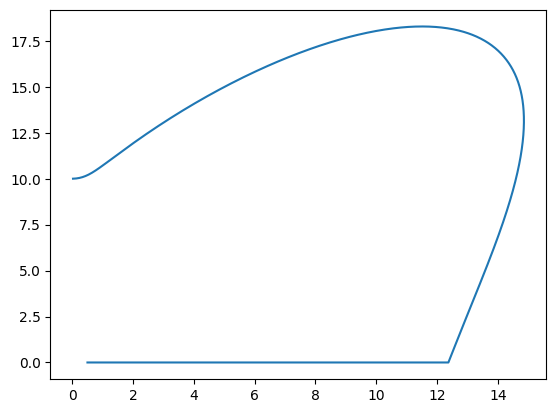

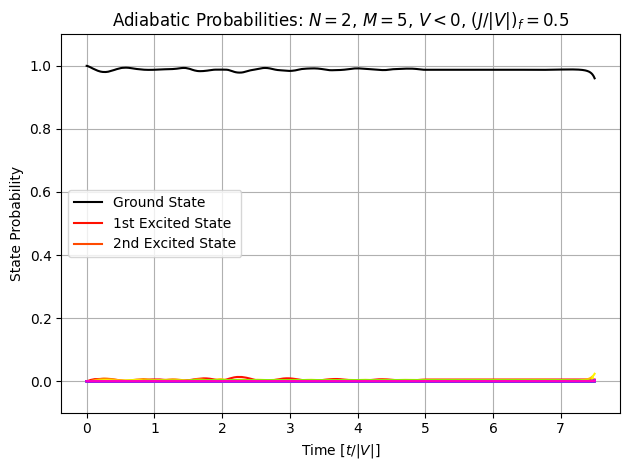

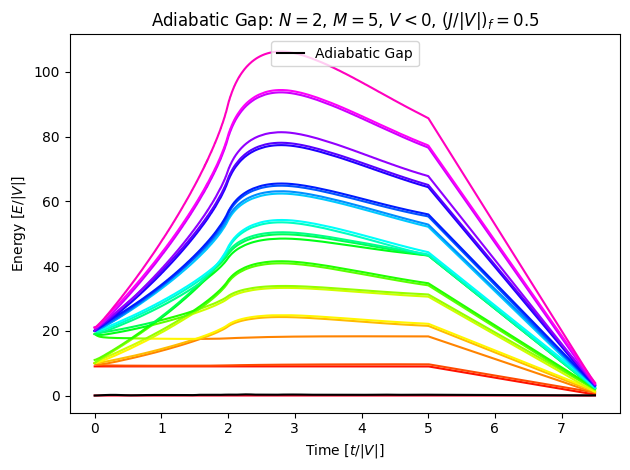

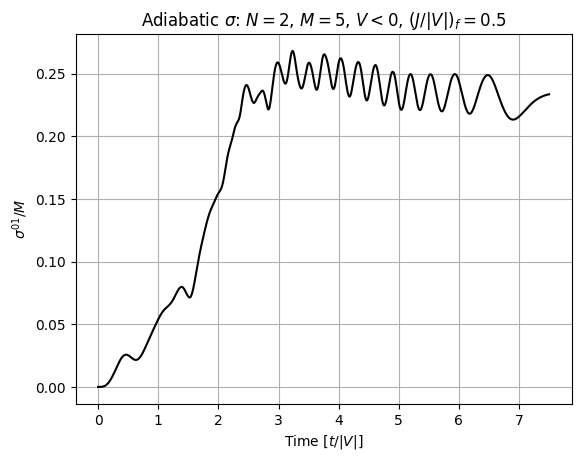

In [49]:
# Example input data
N = 2
M = 5
V = -1
final_J_V_ratio = 0.5
dt = 0.001
Ts = [5]
time_array = [2.5]

final_probs = []

for T in Ts:
    times = np.linspace(0, T, num = int(T/dt))
    target_size = len(times)
    
    x_rescaled = np.interp(np.linspace(0, len(x_values_second_half) - 1, target_size), np.arange(len(x_values_second_half)), x_values_second_half)
    y_rescaled = np.interp(np.linspace(0, len(y_values_second_half) - 1, target_size), np.arange(len(y_values_second_half)), y_values_second_half)
    
    J_V_ratio_routine = x_rescaled
    mu_V_ratio_routine = y_rescaled
    
    J_V_ratios = [[J_V_ratio_routine[-1], final_J_V_ratio]]
    mu_V_ratios = [[0,0]]
    second_half_times, second_half_J_V_ratio_routine, second_half_mu_V_ratio_routine = make_linear_stepped_routines(J_V_ratios, mu_V_ratios, time_array, dt)
    
    full_J_V_ratio_routine = np.concatenate((J_V_ratio_routine, second_half_J_V_ratio_routine))
    full_mu_V_ratio_routine = np.concatenate((mu_V_ratio_routine, second_half_mu_V_ratio_routine))
    full_times = np.concatenate((times, T+second_half_times))
    
    results = simulate_adiabatic_evolution(N, M, V, full_mu_V_ratio_routine, full_J_V_ratio_routine, full_times, dt=dt, initial_state=None)
    adiabatic_probabilities = results[2]
    print(adiabatic_probabilities[-1,0])
    final_probs.append(adiabatic_probabilities[-1, 0])
    
    plt.plot(full_J_V_ratio_routine, full_mu_V_ratio_routine)
    
    plot_adiabatic_evolution(N, M, results, full_times, full_J_V_ratio_routine, full_mu_V_ratio_routine, plot_overlaps=False)
